In [1]:
import pandas as pd
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import json 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import json
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_json('yelp_reviews_small.json',lines=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71315 entries, 0 to 71314
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0                71315 non-null  int64         
 1   review_id    71315 non-null  object        
 2   user_id      71315 non-null  object        
 3   business_id  71315 non-null  object        
 4   stars        71315 non-null  int64         
 5   useful       71315 non-null  int64         
 6   funny        71315 non-null  int64         
 7   cool         71315 non-null  int64         
 8   text         71315 non-null  object        
 9   date         71315 non-null  datetime64[ns]
 10  features     71315 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 6.0+ MB


In [4]:
data.head()

,,review_id,user_id,business_id,stars,useful,funny,cool,text,date,features
0,613970,m5ecGXbh35Kqh4V9haxicA,OAEV6NodmkIQuBEnGjlPiA,KRNrssbpE1AKo48BIpdLw,5,0,0,0,Best sashimi ever Quality food Good service I ...,2019-01-19 23:22:09,"[-0.08915440000000001, 0.36107459999999997, 0...."
1,613971,8F44EKSVg2CvIn0AQf_8A,vBLpG8R3ulwGyomk9ZTtXQ,RHgZxgkzgCkOnz4qNl5Zg,5,0,0,0,Simply Fabulous is the picture of the flowers ...,2019-02-13 13:52:11,"[-0.105960484536082, 0.258084360824742, 0.3483..."
2,682814,rSo5E_ATEIqFMXYwBeWj_A,vNhLOpdCRecDih1K9z5smQ,C6QvZLrdEcw3YhKFekFYCw,5,0,0,0,Peace Frog is great\nThey provide wonderful cu...,2020-10-15 21:15:05,"[-0.144226787878787, 0.18622009090909, 0.19586..."
3,682815,1oOOQfdOafD7nmCQdy4CJg,_buzLtGGQr1CdqKgUxgvkw,5wqAfatUT_1WrCjaNBF5A,5,1,0,0,Went in for a Routine Check Up Noticed How Fa...,2020-02-27 21:51:57,"[-0.122542917647058, 0.002868647058823, 0.2630..."
4,613974,FBy9PwmWFf1j7qSGI3fesA,IDebflwD2Hl8mG8oj6DoQg,2hPkrbzphCtP_e2neIyBPg,5,1,0,1,I was a little nervous after reading a few rev...,2019-02-24 06:57:30,"[-0.158801581395348, 0.202358209302325, 0.3212..."


## 0. Preprocessing

In [5]:
l = data.features.tolist()
features = pd.DataFrame(l,columns=[i for i in range(len(data.features[1]))])
features.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,-0.089154,0.361075,0.414182,-0.196627,-0.237979,-0.204637,0.038888,0.232156,-0.118301,-0.100396,...,1.345971,0.114815,0.533333,0.257624,0.466667,0.288033,3,0.866667,2.704423,0.133333
1,-0.105960,0.258084,0.348384,-0.316416,-0.062082,0.275834,-0.141534,0.236763,-0.070452,-0.109716,...,1.415806,-0.000615,0.729939,0.223449,0.494845,0.288660,1,1.000000,3.688030,0.000000
2,-0.144227,0.186220,0.195862,-0.191816,0.040144,0.048818,-0.152179,0.249534,-0.201297,0.082370,...,1.450126,-0.001529,0.602388,0.221146,0.484848,0.288543,2,0.969697,3.215101,0.030303
3,-0.122543,0.002869,0.263032,-0.220487,0.047923,0.133997,-0.152259,0.304701,-0.172328,0.124563,...,1.394016,0.000029,0.878893,0.111374,0.485294,0.288550,1,1.000000,4.482470,0.000000
4,-0.158802,0.202358,0.321292,-0.364938,-0.154204,0.202798,-0.099203,0.314889,-0.088144,-0.126509,...,1.267160,-0.000217,0.646836,0.251838,0.488372,0.288597,1,1.000000,3.165154,0.000000


In [6]:
# Turn useful > 0 => all equal to 1  
data.loc[data.useful>0,'useful']=1
features['useful']=data.useful

# Turn funny > 0 => all equal to 1  
data.loc[data.funny>0,'funny']=1
features['funny']=data.funny

# Turn cool > 0 => all equal to 1  
data.loc[data.cool>0,'cool']=1
features['cool']=data.cool

In [8]:
data.describe()

,,stars,useful,funny,cool
count,71315.000000,71315.000000,71315.000000,71315.000000,71315.000000
mean,633179.188894,3.796354,0.302026,0.098941,0.154091
std,51449.696345,1.538201,0.459140,0.298585,0.361038
min,410008.000000,1.000000,0.000000,0.000000,0.000000
25%,609771.500000,3.000000,0.000000,0.000000,0.000000
50%,639602.000000,5.000000,0.000000,0.000000,0.000000
75%,670105.500000,5.000000,1.000000,0.000000,0.000000
max,699997.000000,5.000000,1.000000,1.000000,1.000000


# 1. ICMLA

## 1.1 Useful flag

In [9]:
from sklearn.ensemble import RandomForestClassifier

X_ =  features.iloc[:,0:119]
y_ = features['useful']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82     16468
           1       0.57      0.15      0.23      7066

    accuracy                           0.71     23534
   macro avg       0.65      0.55      0.53     23534
weighted avg       0.68      0.71      0.65     23534



## 1.2 Funny Flag

In [10]:
from sklearn.ensemble import RandomForestClassifier

X_ =  features.iloc[:,0:119]
y_ = features['funny']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     21204
           1       0.75      0.00      0.00      2330

    accuracy                           0.90     23534
   macro avg       0.83      0.50      0.48     23534
weighted avg       0.89      0.90      0.85     23534



## 1.3 Cool flag

In [11]:
from sklearn.ensemble import RandomForestClassifier

X_ =  features.iloc[:,0:119]
y_ = features['cool']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92     19862
           1       0.75      0.01      0.01      3672

    accuracy                           0.84     23534
   macro avg       0.80      0.50      0.47     23534
weighted avg       0.83      0.84      0.78     23534



# 2. TF-IDF

## 2.1 Useful flag

In [12]:
%%time

X_ = data['text']
y_ = data['useful']

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     16468
           1       0.71      0.01      0.01      7066

    accuracy                           0.70     23534
   macro avg       0.70      0.50      0.42     23534
weighted avg       0.70      0.70      0.58     23534

CPU times: user 16.7 s, sys: 46.4 ms, total: 16.7 s
Wall time: 7.76 s


## 2.2 Funny Flag

In [13]:
%%time

X_ = data['text']
y_ = data['funny']

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     21204
           1       0.00      0.00      0.00      2330

    accuracy                           0.90     23534
   macro avg       0.45      0.50      0.47     23534
weighted avg       0.81      0.90      0.85     23534

CPU times: user 12.5 s, sys: 33.4 ms, total: 12.5 s
Wall time: 6.71 s


/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.3 Cool

In [14]:
%%time

X_ = data['text']
y_ = data['cool']

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92     19862
           1       0.00      0.00      0.00      3672

    accuracy                           0.84     23534
   macro avg       0.42      0.50      0.46     23534
weighted avg       0.71      0.84      0.77     23534

CPU times: user 13.1 s, sys: 36.7 ms, total: 13.1 s
Wall time: 6.72 s


/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. Trying the balancend dataset ICMLA

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter_u = Counter(features['useful'])
print('useful:',counter_u)
counter_u = Counter(features['funny'])
print('funny:',counter_u)
counter_u = Counter(features['cool'])
print('cool:',counter_u)

useful: Counter({0: 49776, 1: 21539})
funny: Counter({0: 64259, 1: 7056})
cool: Counter({0: 60326, 1: 10989})


## 4.1 Useful flag with smote ICMLA

In [15]:
oversample = SMOTE()

In [15]:
counter_u = Counter(features['useful'])

print(counter_u)

X_useful, y_useful = oversample.fit_resample(features.iloc[:,0:119], features['useful'])

# summarize the new class distribution
counter_u = Counter(y_useful)

print(counter_u)

Counter({0: 49776, 1: 49776})


In [13]:
from sklearn.ensemble import RandomForestClassifier

X_ =  X_useful
y_ = y_useful

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     16527
           1       0.69      0.70      0.70     16326

    accuracy                           0.70     32853
   macro avg       0.70      0.70      0.70     32853
weighted avg       0.70      0.70      0.70     32853



## 4.2 funny flag with smote ICMLA

In [16]:
X_funny, y_funny = oversample.fit_resample(features.iloc[:,0:119], features['funny'])

counter_f = Counter(y_funny)

print(counter_f)

Counter({0: 64259, 1: 64259})


In [17]:
from sklearn.ensemble import RandomForestClassifier

X_ =  X_funny
y_ = y_funny

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     21307
           1       0.77      0.83      0.80     21104

    accuracy                           0.80     42411
   macro avg       0.80      0.80      0.80     42411
weighted avg       0.80      0.80      0.80     42411



## 4.3 Cool flag with smote ICMLA

In [21]:
X_cool, y_cool = oversample.fit_resample(features.iloc[:,0:119], features['cool'])

counter_c = Counter(y_cool)

print(counter_c)

Counter({0: 60326, 1: 60326})


In [22]:
from sklearn.ensemble import RandomForestClassifier

X_ =  X_cool
y_ = y_cool

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     20076
           1       0.77      0.79      0.78     19740

    accuracy                           0.78     39816
   macro avg       0.78      0.78      0.78     39816
weighted avg       0.78      0.78      0.78     39816



# 5 Trying to use smote with tf-idf

## 5.1 Useful flag 

In [26]:
pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer())])

x_features = pipe.fit_transform(data.text)
X_useful, y_useful = oversample.fit_resample(x_features, features['useful'])

# summarize the new class distribution
counter_u = Counter(y_useful)

print(counter_u)

  (0, 73470)	0.2881895926253906
  (0, 67615)	0.16067326796634235
  (0, 60349)	0.14849009146701306
  (0, 58963)	0.44820356058468785
  (0, 54453)	0.25685857495782044
  (0, 53450)	0.26697876894887146
  (0, 50787)	0.3620597998947938
  (0, 48068)	0.27299402482538815
  (0, 46262)	0.19606212121890332
  (0, 30459)	0.2873728574504537
  (0, 30286)	0.1741699508009641
  (0, 27859)	0.13467819395036393
  (0, 25295)	0.22472227711812323
  (0, 10066)	0.19201370544087717
  (0, 7707)	0.2616521099008878
  (1, 75942)	0.1861981836084585
  (1, 75588)	0.118639088238896
  (1, 75547)	0.16675094331860849
  (1, 75323)	0.09293300837899228
  (1, 74827)	0.07642783070597406
  (1, 74685)	0.1267488167332165
  (1, 74593)	0.17208637960125714
  (1, 73944)	0.05212564278080279
  (1, 73579)	0.05918519979558155
  (1, 71413)	0.17310017962370264
  :	:
  (71314, 9640)	0.06379357131586363
  (71314, 9541)	0.0452401771540257
  (71314, 9401)	0.016532203569513838
  (71314, 9284)	0.37911566451766787
  (71314, 9282)	0.06734513847044912

In [28]:
from sklearn.ensemble import RandomForestClassifier

X_ =  X_useful
y_ = y_useful

pipe = Pipeline([
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76     16527
           1       0.80      0.62      0.70     16326

    accuracy                           0.73     32853
   macro avg       0.75      0.73      0.73     32853
weighted avg       0.75      0.73      0.73     32853



## 5.2 funny tfidf with smote

In [30]:
pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer())])

x_features = pipe.fit_transform(data.text)
X_funny, y_funny = oversample.fit_resample(x_features, features['funny'])

# summarize the new class distribution
counter_u = Counter(y_funny)

print(counter_u)

  (0, 73470)	0.2881895926253906
  (0, 67615)	0.16067326796634235
  (0, 60349)	0.14849009146701306
  (0, 58963)	0.44820356058468785
  (0, 54453)	0.25685857495782044
  (0, 53450)	0.26697876894887146
  (0, 50787)	0.3620597998947938
  (0, 48068)	0.27299402482538815
  (0, 46262)	0.19606212121890332
  (0, 30459)	0.2873728574504537
  (0, 30286)	0.1741699508009641
  (0, 27859)	0.13467819395036393
  (0, 25295)	0.22472227711812323
  (0, 10066)	0.19201370544087717
  (0, 7707)	0.2616521099008878
  (1, 75942)	0.1861981836084585
  (1, 75588)	0.118639088238896
  (1, 75547)	0.16675094331860849
  (1, 75323)	0.09293300837899228
  (1, 74827)	0.07642783070597406
  (1, 74685)	0.1267488167332165
  (1, 74593)	0.17208637960125714
  (1, 73944)	0.05212564278080279
  (1, 73579)	0.05918519979558155
  (1, 71413)	0.17310017962370264
  :	:
  (71314, 9640)	0.06379357131586363
  (71314, 9541)	0.0452401771540257
  (71314, 9401)	0.016532203569513838
  (71314, 9284)	0.37911566451766787
  (71314, 9282)	0.06734513847044912

In [31]:
from sklearn.ensemble import RandomForestClassifier

X_ =  X_funny
y_ = y_funny

pipe = Pipeline([
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79     21307
           1       0.77      0.84      0.81     21104

    accuracy                           0.80     42411
   macro avg       0.80      0.80      0.80     42411
weighted avg       0.80      0.80      0.80     42411



## 5.3 Cool flag

In [4]:
pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer())])

x_features = pipe.fit_transform(data.text)
X_cool, y_cool = oversample.fit_resample(x_features, features['funny'])

# summarize the new class distribution
counter_u = Counter(y_cool)

print(counter_u)

NameError: name 'oversample' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_ =  X_funny
y_ = y_funny

pipe = Pipeline([
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

# 6. Lengh?

In [5]:
data['len']=data.text.str.split().str.len()
data.len.describe()

count    71315.000000
mean        95.331347
std         89.673941
min          8.000000
25%         39.000000
50%         68.000000
75%        119.000000
max        996.000000
Name: len, dtype: float64

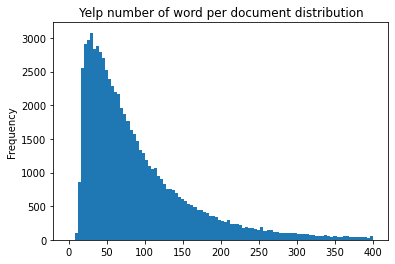

In [34]:
plt = data.len.plot(kind='hist', bins=100,title='Yelp number of word per document distribution',range=[0, 400])

In [35]:
plt.figure.savefig('yelp_word_distribution.eps')
plt.figure.savefig('yelp_word_distribution.jpeg')
plt.figure.savefig('yelp_word_distribution.pdf')